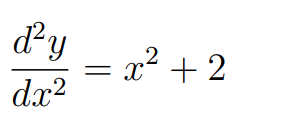

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def exact_sol(x):
  return (x**4 / 12) + x**2 + 2*x + 1

In [3]:
x = np.linspace(0, 1, 100)
y = exact_sol(x)

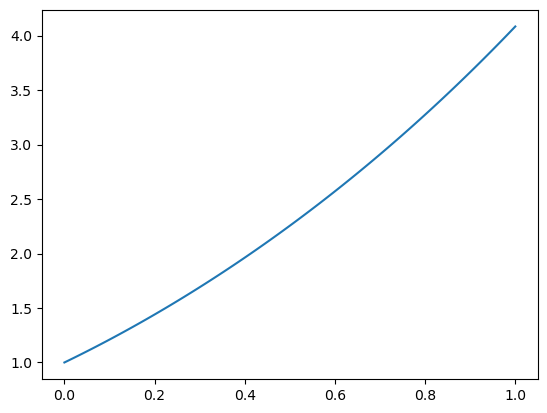

In [4]:
plt.plot(x, y)

In [5]:
import deepxde as dde

No backend selected.
Finding available backend...


Using backend: paddle
Other supported backends: tensorflow.compat.v1, tensorflow, pytorch, jax.
paddle supports more examples now and is recommended.


Found paddle
Setting the default backend to "paddle". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [6]:
geom = dde.geometry.Interval(0, 1)

In [7]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return dy_xx - x**2 - 2

In [8]:
def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 0)

def func(x):
  return x**4 / 12 + x**2 + 2*x + 1

def d_func(x):
  return x**3 / 3 + 2 * x  + 2

def dy_x(x, y, X):
  dy_x = dde.grad.jacobian(y, x)
  return dy_x

bc_l = dde.icbc.DirichletBC(geom, func, boundary_l)

boundary_pts = geom.random_boundary_points(2)
r_boundary_pts = boundary_pts[dde.utils.isclose(boundary_pts, 0)].reshape(-1, 1)
bc_r = dde.icbc.PointSetOperatorBC(r_boundary_pts, d_func(r_boundary_pts), dy_x)

In [9]:
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, solution=exact_sol, num_test=100)

In [10]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

In [11]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
'compile' took 0.000544 s



In [12]:
losshistory, train_state = model.train(iterations=10000)

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [6.55e+00, 1.00e+00, 1.55e+00]    [6.64e+00, 1.00e+00, 1.55e+00]    [8.41e-01]    
1000      [2.84e-04, 4.29e-06, 7.50e-05]    [2.24e-04, 4.29e-06, 7.50e-05]    [1.02e-03]    
2000      [4.93e-05, 3.12e-05, 2.58e-06]    [3.60e-05, 3.12e-05, 2.58e-06]    [2.03e-03]    
3000      [6.12e-06, 2.04e-07, 3.27e-05]    [4.45e-06, 2.04e-07, 3.27e-05]    [1.50e-03]    
4000      [3.99e-06, 1.01e-05, 5.75e-05]    [3.29e-06, 1.01e-05, 5.75e-05]    [2.90e-03]    
5000      [1.19e-05, 2.76e-05, 4.50e-03]    [1.20e-05, 2.76e-05, 4.50e-03]    [1.36e-02]    
6000      [2.60e-06, 1.29e-05, 8.19e-05]    [1.60e-06, 1.29e-05, 8.19e-05]    [1.14e-03]    
7000      [1.89e-06, 1.41e-06, 7.96e-06]    [1.51e-06, 1.41e-06, 7.96e-06]    [1.11e-03]    
8000      [1.84e-06, 3.66e-10, 3.91e-06]    [1.35e-06, 3.66e-10, 3.91e-06]    [4.56e-04]    
9000      [1.68e-06, 7.13e-08, 1.44e-08]    [1.33e-

Saving loss history to c:\Users\ricar\OneDrive\Área de Trabalho\pinn\loss.dat ...
Saving training data to c:\Users\ricar\OneDrive\Área de Trabalho\pinn\train.dat ...
Saving test data to c:\Users\ricar\OneDrive\Área de Trabalho\pinn\test.dat ...


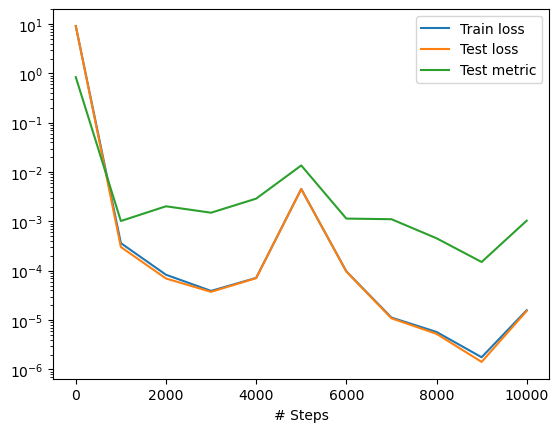

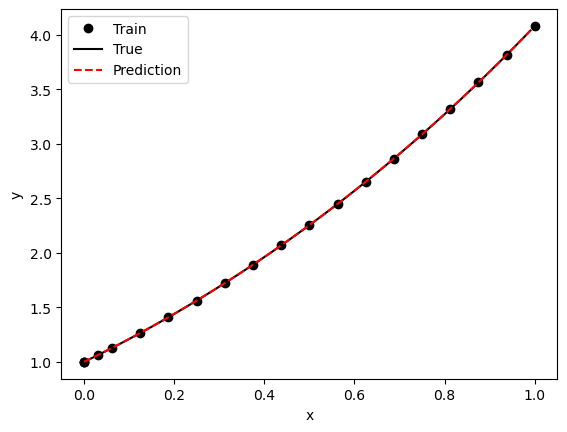

In [13]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [14]:
x = np.vstack(np.ravel(x))
np.max(np.abs(exact_sol(x) - model.predict(x)))

0.004355271657307647